In [31]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score

In [33]:
data=pd.read_csv('Crime_Statistics_2000-2020.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Year              82 non-null     int64 
 1   Type of Crime     82 non-null     object
 2   Number of Crimes  82 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 2.0+ KB


In [34]:
data.tail()

,Year,Type of Crime,Number of Crimes
77,2019,Burglary,5498
78,2019,Robbery,3583
79,2019,Vehicle Theft,4359
80,2020,Assault,4205
81,2020,Burglary,6203


In [36]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,82.0,2009.756098,5.957796,2000.0,2005.0,2010.0,2015.00,2020.0
Number of Crimes,82.0,1698.487805,1422.693301,105.0,524.5,1239.0,2595.25,6203.0


In [37]:
data.isna().sum()

Year                0
Type of Crime       0
Number of Crimes    0
dtype: int64

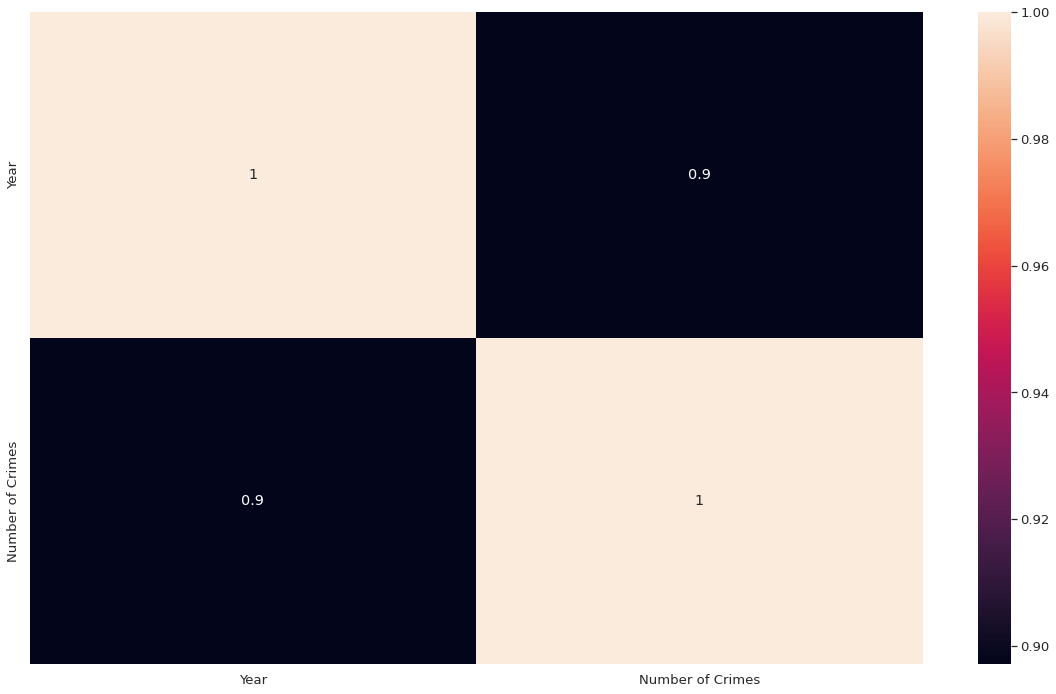

In [39]:
plt.figure(figsize=(20,12))
sns.heatmap(data.corr(),annot=True)
plt.show()


<Figure size 1440x864 with 0 Axes>

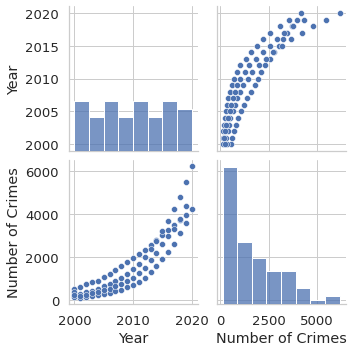

In [44]:
plt.figure(figsize=(20,12))
sns.pairplot(data);

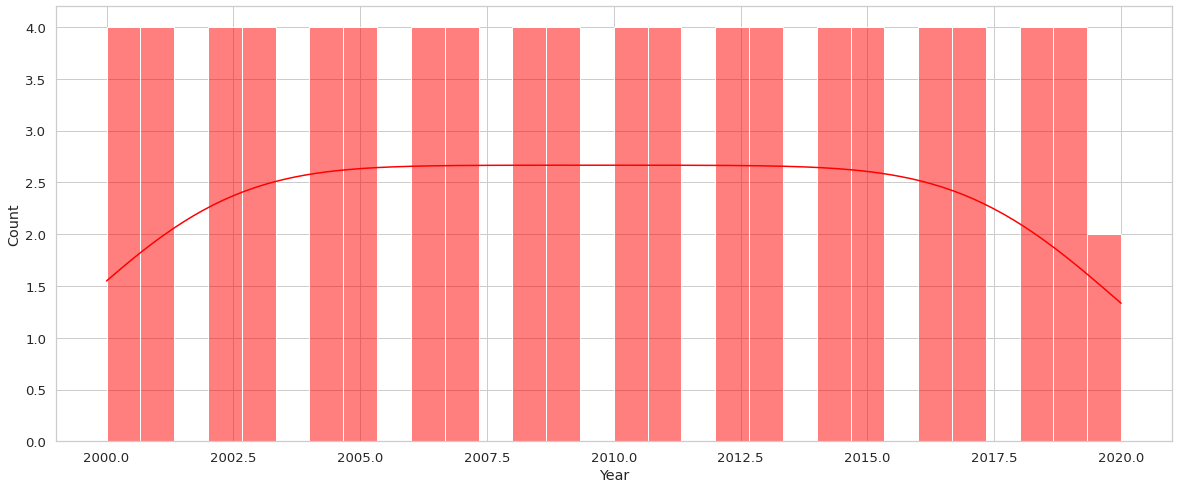

In [54]:
sns.histplot(data["Year"], bins=30, kde=True,color='red');


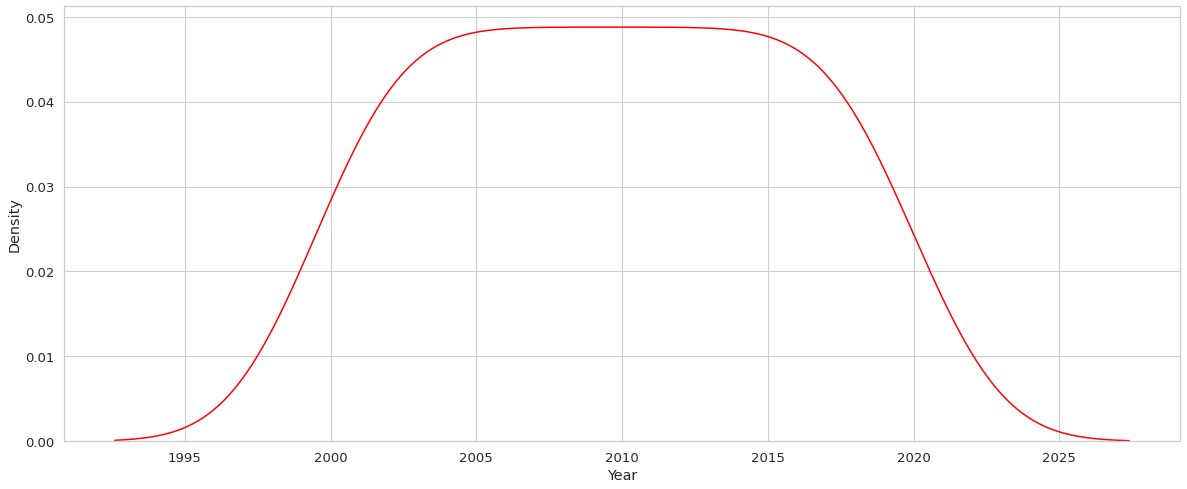

In [51]:
sns.kdeplot(data["Year"],color='red');

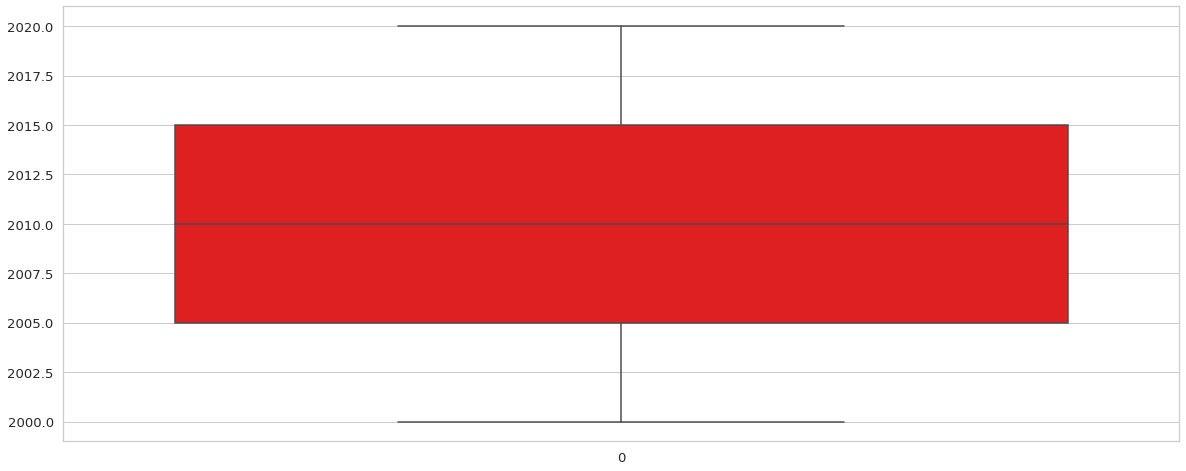

In [53]:
sns.boxplot(data["Year"],color="red");

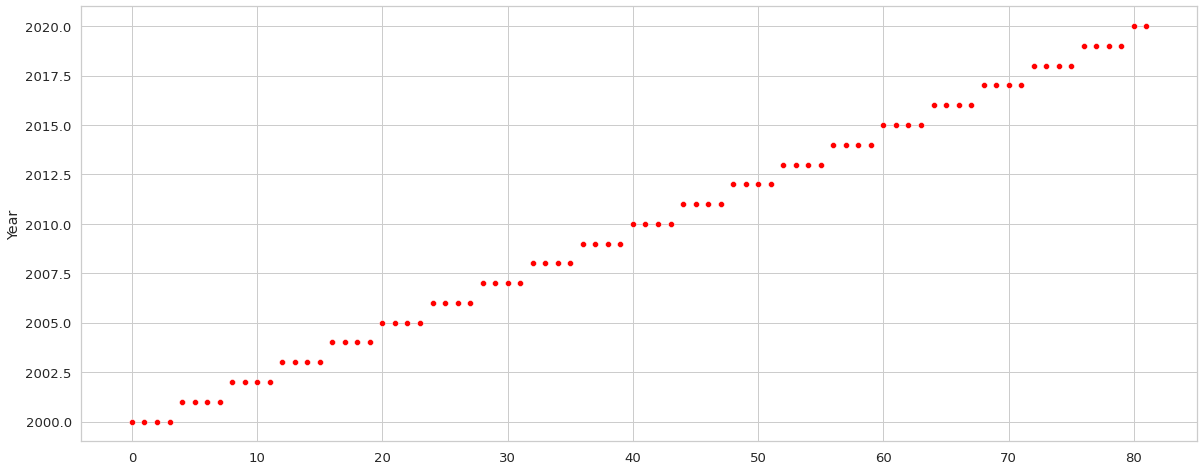

In [56]:
sns.scatterplot(x=data.index, y=data["Year"],color="red");

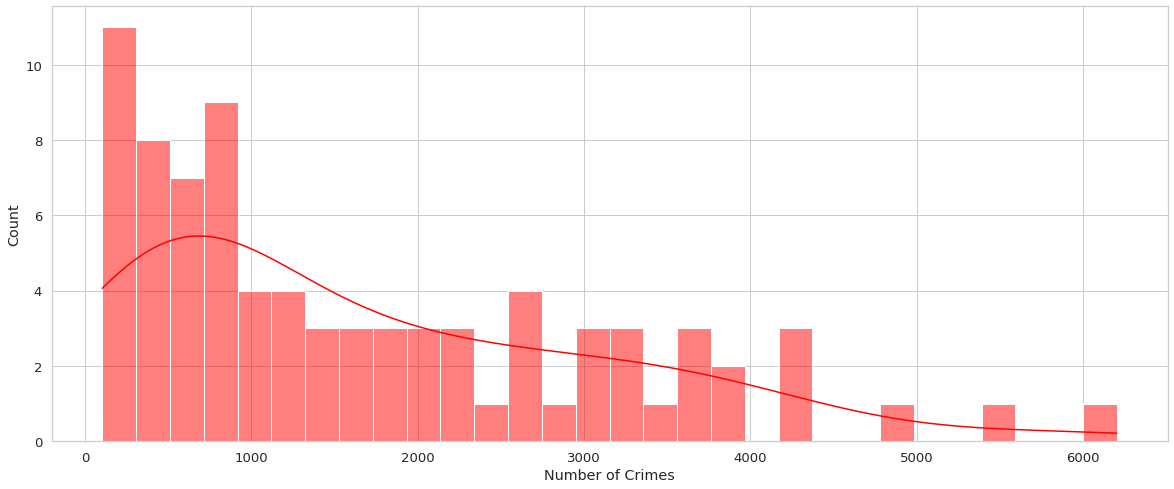

In [59]:
sns.histplot(data["Number of Crimes"], bins=30, kde=True,color='red');


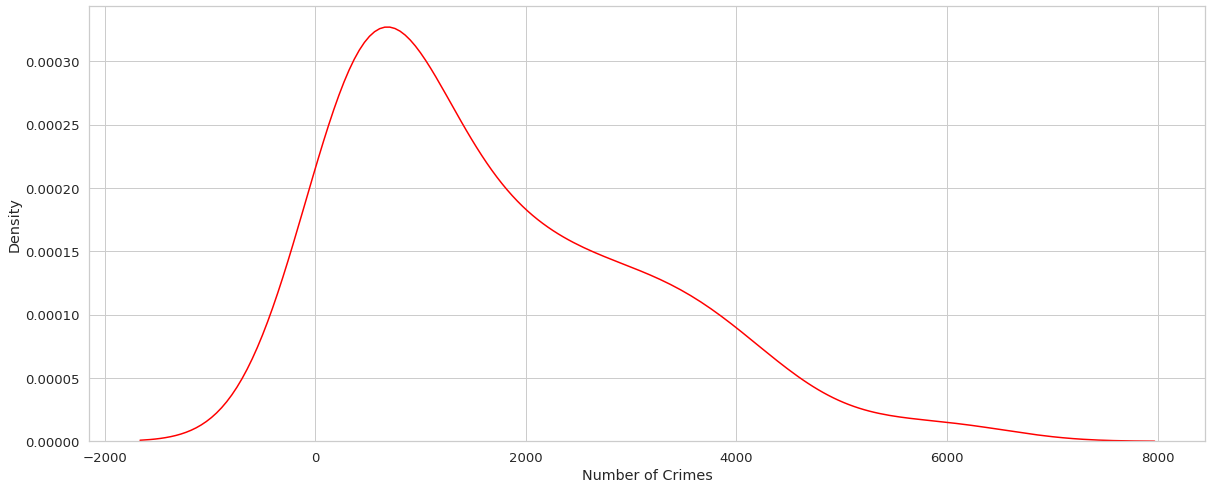

In [60]:
sns.kdeplot(data["Number of Crimes"],color='red');

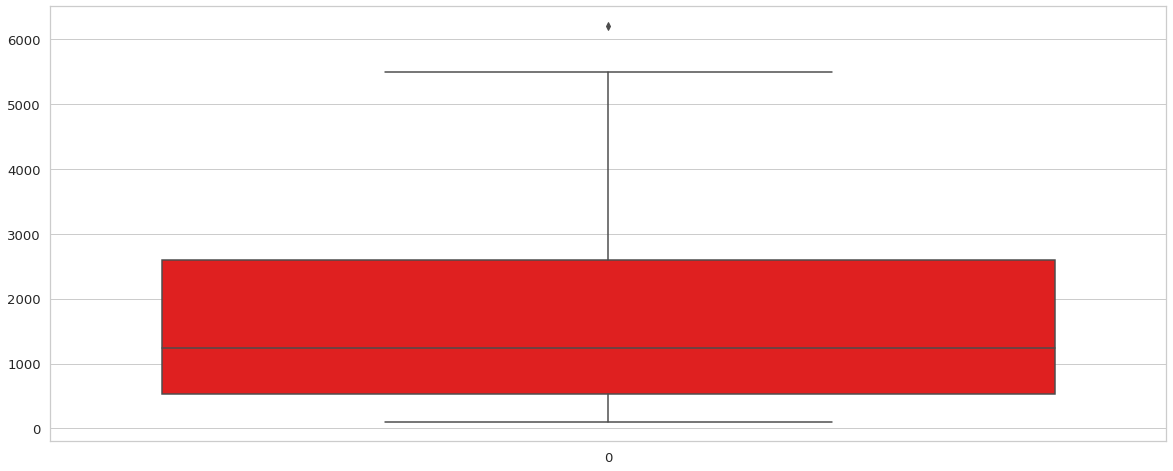

In [61]:
sns.boxplot(data["Number of Crimes"],color="red");

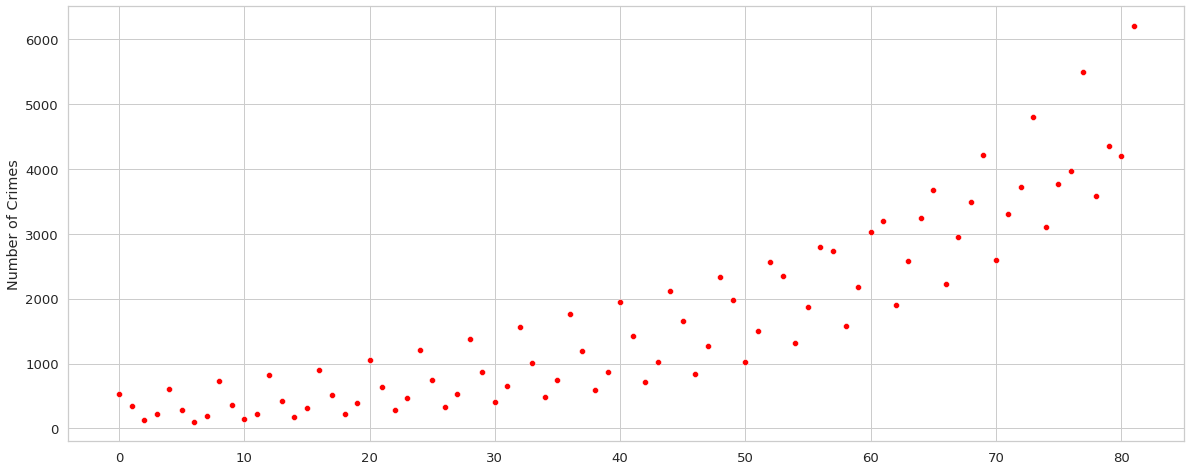

In [62]:
sns.scatterplot(x=data.index, y=data["Number of Crimes"],color="red");

In [65]:
X=data.drop("Type of Crime",axis=1)
y=data["Type of Crime"]

In [71]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.8/481.8 KB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 KB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 KB 3.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 56.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 KB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 KB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 55.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [75]:
from pycaret.clustering import *
from sklearn.datasets import make_blobs
from pycaret  import regression
from sklearn.model_selection import cross_val_score
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
setup(data, session_id = 1)

model = create_model('hclust')

,Description,Value
0,Session id,1
1,Original data shape,"(82, 3)"
2,Transformed data shape,"(82, 6)"
3,Numeric features,2
4,Categorical features,1
5,Preprocess,True
6,Imputation type,simple
7,Numeric imputation,mean
8,Categorical imputation,mode
9,Maximum one-hot encoding,-1


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5967,242.2772,0.4777,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

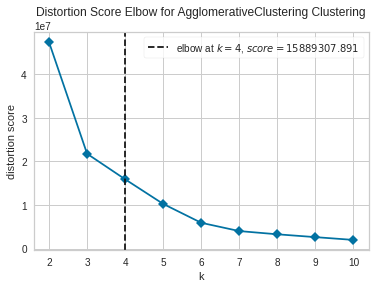

In [76]:
plot_model(model, 'elbow')

In [77]:
model = create_model('hclust', num_clusters = 4)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5967,242.2772,0.4777,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [78]:
plot_model(model, 'cluster')

In [81]:
save_model(model, 'clustering_model')
results = assign_model(model)
plot_model(model, 'distribution')
plt.show()

Transformation Pipeline and Model Successfully Saved


In [82]:
models()

,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch


In [83]:
model1 = create_model('kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5895,316.7718,0.5430,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

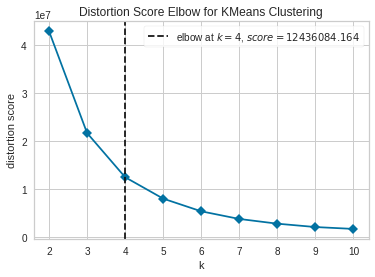

In [84]:
plot_model(model1, 'elbow')